# Laboratorio 06: Álgebra Lineal.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Ana Sofia Del Rio
*Métodos computacionales 2025-I*

---

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.linalg import expm, eig
import pandas as pd

# 1.

<center>

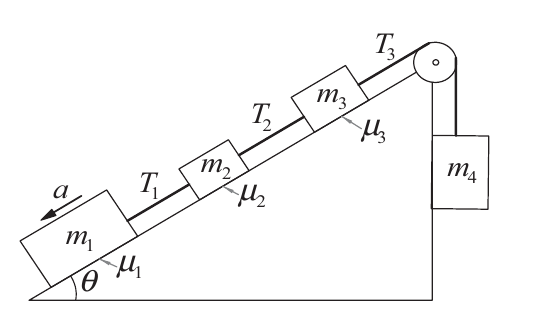

</center>

Cuatro bloques de masas diferentes $m_i$ están conectados por cuerdas de masa despreciable. Tres de los bloques se encuentran sobre un plano inclinado con un ángulo $\theta$, donde los coeficientes de fricción entre los bloques y el plano son $\mu_i$. Las ecuaciones de movimiento para el sistema son:

$$
T_1 + m_1a = m_1g(\sin \theta - \mu_1 \cos \theta)
$$
$$
-T_1 + T_2 + m_2a = m_2g(\sin \theta - \mu_2 \cos \theta)
$$
$$
-T_2 + T_3 + m_3a = m_3g(\sin \theta - \mu_3 \cos \theta)
$$
$$
-T_3 + m_4a = -m_4g
$$

donde:
- $T_i$ representan las tensiones en las cuerdas
- $a$ es la aceleración del sistema
- $\theta = 45^\circ$ es el ángulo de inclinación
- $g = 9.81 m/s^2$ es la aceleración gravitatoria


Determine $a$ y $T_i$

**Datos:**

Masas de los bloques:
$$
\mathbf{m} = \begin{bmatrix}
10 & 4 & 5 & 6 \\
\end{bmatrix}^T kg
$$

Coeficientes de fricción:
$$
\mu = \begin{bmatrix}
0.25 & 0.3 & 0.2 \\
\end{bmatrix}^T
$$


In [3]:
#Datos
m = np.array([10, 4, 5, 6])
mu = np.array([0.25, 0.3, 0.2])
theta = np.deg2rad(45)
g = 9.81

A = np.array([
    [ 1.0,  0.0,  0.0, m[0]],
    [-1.0,  1.0,  0.0, m[1]],
    [ 0.0, -1.0,  1.0, m[2]],
    [ 0.0,  0.0, -1.0, m[3]]
])
#Tomando como variables x= [T1, T2, T3, a]
b = np.zeros(4)
b[0] = m[0]*g*(np.sin(theta) - mu[0]*np.cos(theta))
b[1] = m[1]*g*(np.sin(theta) - mu[1]*np.cos(theta))
b[2] = m[2]*g*(np.sin(theta) - mu[2]*np.cos(theta))
b[3] = -m[3]*g

x = np.linalg.solve(A, b)
T1, T2, T3, a = x

print(f'T1 = {T1:.6f} N')
print(f'T2 = {T2:.6f} N')
print(f'T3 = {T3:.6f} N')
print(f'a  = {a:.6f} m/s^2')

T1 = 35.891357 N
T2 = 48.860557 N
T3 = 68.540415 N
a  = 1.613402 m/s^2


# 2.
Considere el circuito de la figura. Usando las leyes de Kirchoff escriba las ecuaciones para corriente y voltaje. Luego, determine la forma matricial y encuentre los valores de la corriente que circula por cada nodo, es decir, $i_{12}$, $i_{23}$ y asi sucesivamente.

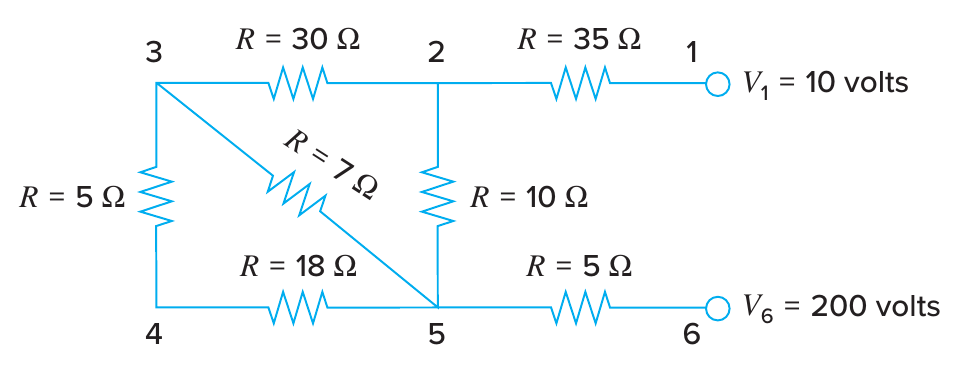


In [8]:
#Parámetros del circuito
#Voltajes
V1 = 10
V6 = 200
#Resistencias
R1_2 = 35
R2_3 = 30
R2_5 = 10
R3_4 = 5
R3_5 = 7
R4_5 = 18
R5_6 = 5

#Usando las leyes de Kirchhoff se obtuvo la siguiente matriz
#Las ecuaciones están organizadas en el siguiente orden: V2, V3, V4, V5.
G = np.array([
    [1/R1_2 + 1/R2_3 + 1/R2_5, -1/R2_3,0, -1/R2_5],
    [-1/R2_3, 1/R2_3 + 1/R3_4 + 1/R3_5, -1/R3_4, -1/R3_5],
    [0, -1/R3_4, 1/R3_4 + 1/R4_5, -1/R4_5],
    [-1/R2_5, -1/R3_5, -1/R4_5, 1/R2_5 + 1/R3_5 + 1/R4_5 + 1/R5_6]
])

#Vector de corrientes
#Este vector representa las corrientes conocidas que entran o salen de los nodos debido a las fuentes de voltaje V1 y V6.
I = np.array([
    V1 / R1_2,  #Corriente entrando al nodo 2 desde la fuente V1
    0,          #No hay fuentes conectadas directamente al nodo 3
    0,          #No hay fuentes conectadas directamente al nodo 4
    V6 / R5_6   #Corriente entrando al nodo 5 desde la fuente V6
])

#Resolver el sistema de ecuaciones lineales G * V = I
V = np.linalg.solve(G, I)

V2, V3, V4, V5 = V

print('\nVoltajes en los nodos:')
print(f'V2 = {V2:.2f} V')
print(f'V3 = {V3:.2f} V')
print(f'V4 = {V4:.2f} V')
print(f'V5 = {V5:.2f} V')

#Calcular las corrientes de cada rama usando la Ley de Ohm
i1_2 = (V1 - V2) / R1_2
i2_3 = (V2 - V3) / R2_3
i2_5 = (V2 - V5) / R2_5
i3_4 = (V3 - V4) / R3_4
i3_5 = (V3 - V5) / R3_5
i4_5 = (V4 - V5) / R4_5
i5_6 = (V5 - V6) / R5_6

print('\nCorrientes que circulan por cada rama:')
print(f'i1_2 = {i1_2:.2f} A')
print(f'i2_3 = {i2_3:.2f} A')
print(f'i2_5 = {i2_5:.2f} A')
print(f'i3_4 = {i3_4:.2f} A')
print(f'i3_5 = {i3_5:.2f} A')
print(f'i4_5 = {i4_5:.2f} A')
print(f'i5_6 = {i5_6:.2f} A')


Voltajes en los nodos:
V2 = 149.13 V
V3 = 175.42 V
V4 = 176.44 V
V5 = 180.12 V

Corrientes que circulan por cada rama:
i1_2 = -3.98 A
i2_3 = -0.88 A
i2_5 = -3.10 A
i3_4 = -0.20 A
i3_5 = -0.67 A
i4_5 = -0.20 A
i5_6 = -3.98 A


# 3.
Se sabe que un sistema físico es gobernado por las ecuaciones,

$$
\begin{matrix}
x' &=& 2x&-y&+z, \\
y' &=&   &3y&-z, \\
z' &=& 2x&+y&+3z,
\end{matrix}
$$

donde $x',y',z'$ son las derivadas, en forma vectorial esto se puede representar como $\mathbf{r}'=A\mathbf{r}$ que tiene solución analítica general, $\mathbf{r} = e^{At} \mathbf{r}(0)$.

- Realice la diagonalización de $A$.

- Use el hecho de que $f(A) =U f(D) U^{-1}$ para encontrar $x(t),y(t),z(t)$ en el intervalo de tiempo $[0,2]$.

- Grafique $x(t),y(t),z(t)$ (use la condición inicial $\mathbf{r}(0)=(1,1,2))$.

- Compare el resultado a la solución analítica,

$$
2x  = x(0)(e^{2t}(1+e^{2t}-2t)) + y(0) (-2te^{2t}) + z(0)(e^{2t}(-1+e^{2t})),
$$

$$
2y  = x(0)(-e^{2t}(-1+e^{2t}-2t)) + y(0)(2(t+1)e^{2t}) + z(0)(-e^{2t}(-1+e^{2t})),
$$

$$
2z  = x(0)(e^{2t}(-1+e^{2t}+2t)) + y(0)(2te^{2t}) + z(0)(e^{2t}(1+e^{2t})).
$$

True


/tmp/ipython-input-1185159208.py:40: ComplexWarning: Casting complex values to real discards the imaginary part
  x_vals[i] = r_t[0]
/tmp/ipython-input-1185159208.py:41: ComplexWarning: Casting complex values to real discards the imaginary part
  y_vals[i] = r_t[1]
/tmp/ipython-input-1185159208.py:42: ComplexWarning: Casting complex values to real discards the imaginary part
  z_vals[i] = r_t[2]


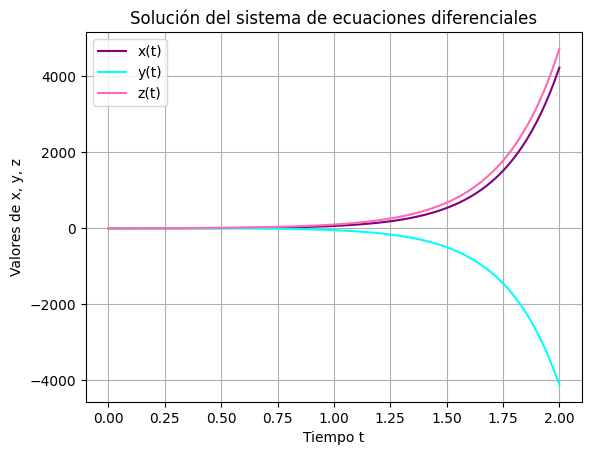

In [5]:
A = np.array([
    [2, -1, 1],
    [0, 3, -1],
    [2, 1, 3]
])
r0 = np.array([1, 1, 2])

#Valores y vectores propios
eigvals, eigvec = np.linalg.eig(A)

eigvals = np.real_if_close(eigvals)
eigvecs = np.real_if_close(eigvec)

#D y U
D = np.diag(eigvals)
U = eigvecs
U_inv = np.linalg.inv(U)

#Verificar que A = U @ D @ U_inv
A_ = U @ D @ U_inv
print(np.allclose(A, A_))

#Solución analítica
def exp_matriz(D, t):
    '''Calcula la exponencial de la matriz diagonal D*t'''
    return np.diag(np.exp(np.diag(D) * t))

def sol_analitica(t, r0, U, D, U_inv):
    '''Calcula la solución analítica r(t)'''
    return U @ exp_matriz(D, t) @ U_inv @ r0

#Datos para el gráfico
t_vals = np.linspace(0, 2, 100)
x_vals = np.zeros_like(t_vals)
y_vals = np.zeros_like(t_vals)
z_vals = np.zeros_like(t_vals)

for i, t in enumerate(t_vals):
    r_t = sol_analitica(t, r0, U, D, U_inv)
    x_vals[i] = r_t[0]
    y_vals[i] = r_t[1]
    z_vals[i] = r_t[2]

#Graficar x(t), y(t) y z(t)
plt.plot(t_vals, x_vals, label='x(t)', color='purple')
plt.plot(t_vals, y_vals, label='y(t)', color='cyan')
plt.plot(t_vals, z_vals, label='z(t)', color='hotpink')
plt.title('Solución del sistema de ecuaciones diferenciales')
plt.xlabel('Tiempo t')
plt.ylabel('Valores de x, y, z')
plt.legend()
plt.grid()
plt.show()

# 4.
Un electrón interactúa con un campo magnético uniforme. Para determinar los niveles de energía permitidos del electrón en presencia del campo magnético, es necesario resolver la ecuación:

$$
\hat{H}|\Psi\rangle = E|\Psi\rangle
$$

donde el Hamiltoniano está dado por $H = -{\mu} \cdot {B} = -\gamma {B} \cdot {S}$, siendo $\gamma$ la razón giromagnética, ${B}$ el campo magnético y ${S}$ el espín. Puede demostrarse que el Hamiltoniano se expresa como:

$$
\hat{H} = -\frac{\gamma\hbar}{2}\begin{pmatrix}
B_z & B_x - iB_y \\
B_x + iB_y & -B_z
\end{pmatrix}
$$

El valor experimental de $\gamma$ para el electrón es 2. El orden de magnitud del campo magnético es 1 gauss en dirección z.

- Verifique que $H$ es hermítica.
- Encuentre los niveles de energía permitidos.
- Determine los autovectores y verifique su normalización.



In [6]:
#Constantes
gamma = 2
B = np.array([0, 0, 1])
Bx, By, Bz = B
hbar = 1.054571817e-34

#Hamiltoniano
H = -(gamma * hbar / 2) * np.array([
    [Bz, Bx - 1j*By],
    [Bx + 1j*By, -Bz]
], dtype=complex)

#Verificar si H es hermítica
hermitico = np.allclose(H, H.conjugate().T)

#Valores y vectores propios
valores, vectores = np.linalg.eigh(H)

vectores_normalizados = np.array([
    v / np.linalg.norm(v) for v in vectores.T
]).T

#Resultados
print('-Hamiltoniano H:\n', H)
print('-¿H es hermítico?:', hermitico)
print('-Niveles de energía permitidos (valores propios):\n', valores)
print('-Vectores propios normalizados:\n', vectores_normalizados)

-Hamiltoniano H:
 [[-1.05457182e-34+0.j -0.00000000e+00+0.j]
 [-0.00000000e+00+0.j  1.05457182e-34-0.j]]
-¿H es hermítico?: True
-Niveles de energía permitidos (valores propios):
 [-1.05457182e-34  1.05457182e-34]
-Vectores propios normalizados:
 [[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]


# 5.

Considere el sistema de tres masas y cuatro resortes mostrado en la figura.

<center>

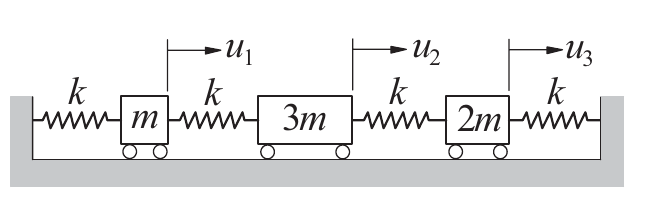
</center>

Las ecuaciones diferenciales que describen el movimiento del sistema masa-resorte son:

$$
k \left( -2u_1 + u_2 \right) = m\ddot{u}_1
$$

$$
k(u_1 - 2u_2 + u_3) = 3m\ddot{u}_2
$$

$$
k(u_2 - 2u_3) = 2m\ddot{u}_3
$$

donde:
- $u_i(t)$ representa el desplazamiento de la masa $i$ desde su posición de equilibrio.
- $k$ es la constante de los resortes.
- $m$ es la masa.

Determinar las frecuencias de vibración ($\omega$) en términos de $\sqrt{k/m}$ y las formas modales correspondientes.

In [9]:
#Parámetros simbólicos
k = 1  #Constante de los resortes
m = 1  #Masa

#Matriz de rigidez
K = k * np.array([
    [-2,  1,  0],
    [ 1, -2,  1],
    [ 0,  1, -2]
], dtype=float)

#Matriz de masas
M = m * np.array([
    [1, 0, 0],
    [0, 3, 0],
    [0, 0, 2]
], dtype=float)

#Valores (frecuencias) y vectores (formas modales) propios
eigvals, eigvecs = np.linalg.eig(np.linalg.inv(M) @ K)

#Ordenar por frecuencia creciente
idx = np.argsort(eigvals)
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

#Frecuencias naturales
omega = np.sqrt(-eigvals)
#y tomamos la raíz cuadrada del negativo del valor propio pues la fuerza restauradora de los resortes actúa en dirección opuesta al desplazamiento

#Normalizamos las formas modales
f_modales = eigvecs / np.max(np.abs(eigvecs), axis=0)

print('Frecuencias naturales ω:\n', omega)
print('Formas modales:\n', f_modales)


Frecuencias naturales ω:
 [1.49429737 1.08670167 0.50281358]
Formas modales:
 [[ 1.         -0.44176551  0.57235137]
 [-0.23292464 -0.36184106  1.        ]
 [ 0.09446021  1.          0.66918414]]
